# Analisi comparativa EKAR vs OULU: Risposta al Forbush Decrease generato dall'X-Flare del 18/01/2026

1. **Obiettivo dell'Analisi**

	* Validare e caratterizzare il rivelatore di muoni **EKAR** (bassa statistica $\approx 230$ CPM) confrontandolo con il monitor di neutroni **OULU** (alta statistica $\approx 5000$ CPM, standard scientifico), durante un evento di attività solare significativo (*Forbush Decrease*).
	
	* Quantificare **come** la diversa fisica (Muoni vs Neutroni) e la diversa posizione geografica influenzano le misure.



2. **Metodologia**

	Poiché **OULU** ha una risoluzione temporale e statistica molto superiore, vengono eseguiti diversi passaggi di *resampling* e *scaling*:
	
	- **Resampling:** trasformazione dei dati ad alta frequenza di **OULU** in una *banda di confidenza* oraria (Min-Max e IRQ).
	
	- **Scaling:** Stima del coefficiente $k \approx 0.043$ per portare l'intensità del segnale di **OULU** alla scala di **EKAR**.
	
	L'assunzione è: se **EKAR** misurasse esattamente la stessa fisica di **OULU**, il suo segnale dovrebbe rimanere confinato dentro questa banda.



3. **Analisi Effettuate**

	Sono state eseguite tre analisi principali, ognuna con uno scopo specifico:
	
	1. **Analisi del Posizionamento (Fan Chart)**
	
		Verifica della stabilità del segnale e della risposta all'evento, sovrapponendo il trend di **EKAR** alle bande di confidenza di **OULU**.
	
		**Risultato:**
		
		- In fase di quiete, **EKAR** naviga stabilmente dentro la banda.
		
		- Durante *Forbush Decrease*, **EKAR** esce dalla banda andando in **Overshoot**.
		
		**Interpretazione:** **EKAR** subisce una diminuzione percentuale minore rispetto a **OULU** poiché i muoni, generati da raggi cosmici primari più energetici, sono meno influenzati dal campo magnetico terrestre.
	
	1. **Cross-Correlazione**
	
		Quantificare il ritardo temporale tra i due strumenti, dovuto alla diversa posizione geografica, tramite cross-correlazione sui dati orari.
		
		**Risultato:** si ha un ritardo sistematico di **+2 ore** per **EKAR** rispetto a **OULU**.
		
		**Interpretazione:** Questo ritardo è la somma di due fattori:
		
		1. **Rotazione Terrestre:** Differenza di longitudine (~1 ora).
		
		2. **Fisica (Rigidità):** La diversa curvatura delle particelle nel campo magnetico terrestre fa sì che **EKAR** "guardi" in una direzione asintotica diversa.
		
		_Tale risultato è confermato da una precedente analisi dove si confrontava l'andamento giorno-notte dei conteggi per i due rilevatori._

	1. **Spazio delle Fasi**
	
		Studiare la dinamica dell'evento ovvero come il sistema reagisce e recupera, plottando **OULU** sull'asse $x$ e **EKAR** sull'asse $y$, colorando i punti in base al tempo.
		
		**Risultato:** è visibile un **ciclo di isteresi**, un loop antiorario invece di una linea retta.
		
		**Interpretazione:** **EKAR** recupera il livello di segnale pre-evento molto più velocemente di **OULU**. Le particelle ad alta energia risentono meno del disturbo magnetico rispetto a quelle a bassa energia.    


4. **Conclusioni**
	
	Nonostante la bassa statistica e il rumore intrinseco (che richiede smoothing come la media mobile), **EKAR è validato** e _vede la stessa fisica di **OULU**_. 
	
	La differenza fondamentale è la **Rigidità di Taglio** $R_c$ :
	
	- **OULU (~0.8 GV):** Misura neutroni generati da primari di bassa energia. È sensibilissimo alle variazioni solari con picchi profondi e recuperi più lenti.
	
	- **EKAR (~4.0 GV):** Misura muoni generati da primari di alta energia. È meno sensibile con picchi meno marcati durante le tempeste solari e recuperi veloci.
		
	Infine, il ritardo di 2 ore non è un difetto, ma una caratteristica del suo cono di accettazione nel campo geomagnetico e della posizione relativa.
	
	In conclusione, **EKAR** è uno strumento complementare e molto meno costoso (**EKAR** $\sim$ 2800€ vs **OULU** più di 250 mila € solo il rivelatore) che sonda una porzione più energetica dello spettro dei raggi cosmici.

In [53]:
# --- import ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# caricamento dei file sui df e conversione della data a indice del df
df_ekar = pd.read_csv("ekar.txt", sep="\t", decimal=',')
df_ekar['Date'] = pd.to_datetime(df_ekar['Date'], dayfirst=True)
df_ekar.set_index('Date', inplace=True)
display(df_ekar.head(5))

df_oulu = pd.read_csv("oulu.txt", sep=";", decimal=',')
df_oulu['Date'] = pd.to_datetime(df_oulu['Date'])
df_oulu.set_index('Date', inplace=True)
display(df_oulu.head(5))

,Temp,Press,Counts,PCC,Err PCC,PTCC,Err PTCC
Date,,,,,,,
2026-01-17 08:00:00,19.0,869.39,13933,14062.15,119.37,14151.48,118.42
2026-01-17 09:00:00,19.3,869.71,14063,14201.14,119.38,14298.20,118.43
2026-01-17 10:00:00,19.3,869.93,14045,14188.30,119.38,14285.28,118.43
2026-01-17 11:00:00,19.5,869.65,13772,13905.85,119.35,14005.38,118.41
2026-01-17 12:00:00,19.7,869.24,13833,13957.64,119.36,14062.04,118.41


,Counts
Date,
2026-01-17 08:00:00,91.601
2026-01-17 08:01:00,91.659
2026-01-17 08:02:00,93.146
2026-01-17 08:03:00,93.522
2026-01-17 08:04:00,90.798


In [54]:
# scelgo i conteggi di EKAR da utilizzare PTCC (Pressure Temperature Corrected Counts)
ekar_counts = 'PTCC'

# scalo EKAR a conteggi al minuto dato che integra ogni ora
df_ekar[ekar_counts] /= 60 # min

# scalo OULU a conteggi al minuto dato che riporta conteggi al secondo
df_oulu['Counts'] *= 60 # sec

# coefficente per scalare i conteggi di OULU a quelli di EKAR
k = df_ekar['PTCC'].mean() / df_oulu['Counts'].mean()

## Fan Chart

Statistiche di Conformità (EKAR vs OULU):
 - EKAR fuori dal IQR: 57.2% del tempo
 - EKAR fuori dagli estremi (Min-Max): 8.2% del tempo


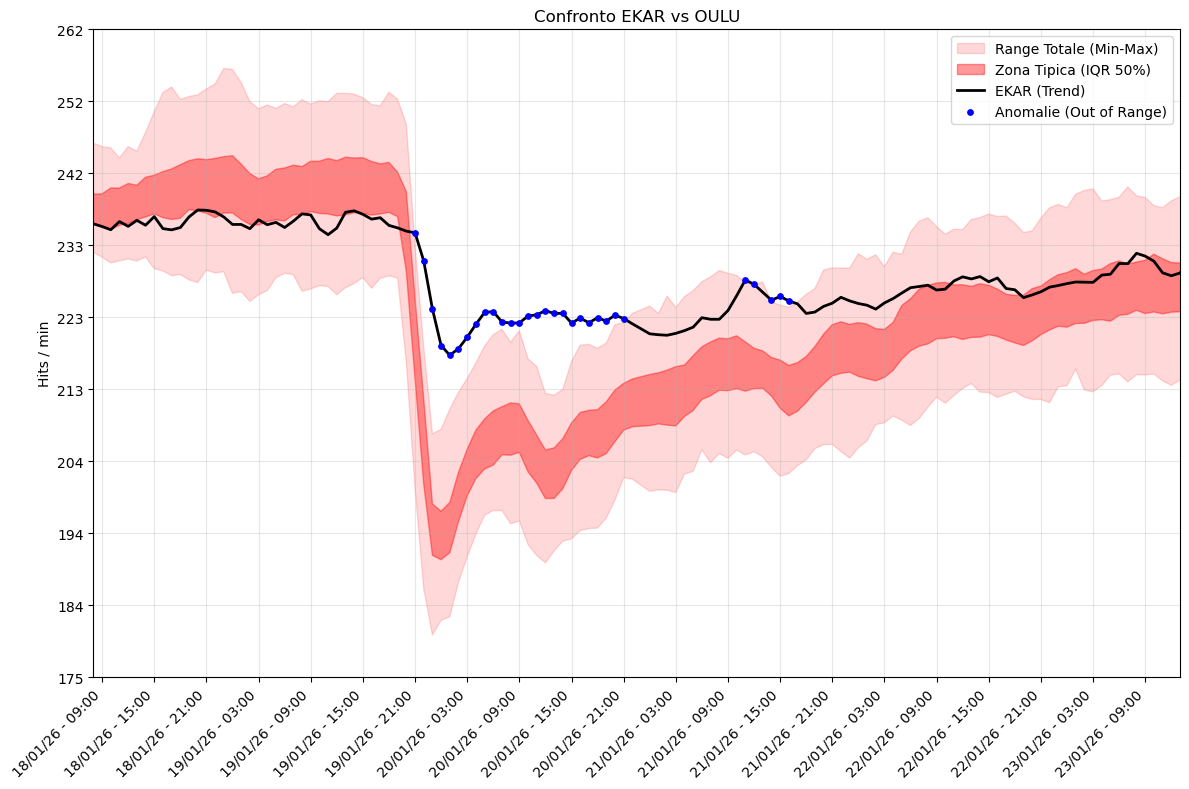

In [55]:
# --- Preparazione delle Bande di OULU ---
# metriche: Min, Max, 25% (Q1), 75% (Q3)
oulu_stats = df_oulu['Counts'].resample('1h').agg([
    'min', 
    'max', 
    'mean',
    lambda x: x.quantile(0.25), 
    lambda x: x.quantile(0.75)
])

# rinomino le colonne dei quantili per comodità
oulu_stats.columns = ['min', 'max', 'mean', 'q25', 'q75']
oulu_stats = oulu_stats.rolling(window=3, center=True).mean()

# applico lo scaling con k
oulu_scaled = oulu_stats * k

# media mobile a 3 punti per smussare EKAR
ekar_smooth = df_ekar[ekar_counts].rolling(window=3, center=True).mean()

# prendo gli indici comuni
common_idx = oulu_scaled.index.intersection(ekar_smooth.index)
oulu_final = oulu_scaled.loc[common_idx]
ekar_final = ekar_smooth.loc[common_idx]

# --- Calcolo Statistiche "Out of Band" ---
# calcolo delle volte in cui EKAR esce dal IQR di OULU
is_out_iqr = (ekar_final < oulu_final['q25']) | (ekar_final > oulu_final['q75'])
pct_out_iqr = is_out_iqr.mean() * 100

# calcolo delle volte in cui EKAR esce dal Min-Max di OULU
is_out_total = (ekar_final < oulu_final['min']) | (ekar_final > oulu_final['max'])
pct_out_total = is_out_total.mean() * 100

print(f"Statistiche di Conformità (EKAR vs OULU):")
print(f" - EKAR fuori dal IQR: {pct_out_iqr:.1f}% del tempo")
print(f" - EKAR fuori dagli estremi (Min-Max): {pct_out_total:.1f}% del tempo")

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# banda totale (Min-Max)
ax.fill_between(oulu_final.index, 
                oulu_final['min'], 
                oulu_final['max'], 
                color='red', alpha=0.15, label='Range Totale (Min-Max)')

# banda centrale (IQR)
ax.fill_between(oulu_final.index, 
                oulu_final['q25'], 
                oulu_final['q75'], 
                color='red', alpha=0.4, label='Zona Tipica (IQR 50%)')

# EKAR (Media Mobile)
ax.plot(ekar_final.index, ekar_final, color='black', lw=2, label='EKAR (Trend)')

# i punti dove EKAR esce dal Min-Max
outliers = ekar_final[is_out_total]
ax.scatter(outliers.index, outliers, color='blue', s=15, zorder=5, label='Anomalie (Out of Range)')

ax.set_title(f"Confronto EKAR vs OULU")
ax.set_ylabel("Hits / min")
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# scelgo il range di dati di interesse
t_start = pd.Timestamp("2026-01-18 08:00:00")
t_end   = pd.Timestamp("2026-01-23 13:00:00")
ax.set_xlim(t_start, t_end)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(round(start-2,0), round(end+1,0), 10))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y - %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.tight_layout()
plt.show()

Osservando il grafico sopra:

1. **Prima dell'evento:** **EKAR** naviga stabilmente nella parte bassa della fascia rossa scura (IQR). È leggermente sotto la mediana di **OULU**, ma solidamente in range.
    
2. **L'Evento (Picco negativo):** I punti blu (anomalie) esplodono esattamente durante il _Forbush Decrease_. **EKAR** esce completamente non solo dall'IQR, ma anche dal range totale. Questo comportamento si deve alla fisica dei muoni, i quali vengono modulati con diversa intensità rispetto ai neutroni.
    
3. **Recupero:** **EKAR** rientra lentamente nella banda, passando dal bordo inferiore (pre-evento) al bordo superiore (post-evento).


Per approfondire cosa accade quando EKAR si avvicina troppo agli estremi, si procede con un **Grafico di Posizionamento Relativo**.

**La Metrica: Score di Posizionamento ($P$)**

Definiamo per ogni ora $t$:

$$P(t) = \frac{E(t) - O_{min}(t)}{O_{max}(t) - O_{min}(t)}$$

Dove:

- $O_{min}$ e $O_{max}$ sono gli estremi della banda rosa (**OULU** scalato).
- $E(t)$ è il valore di **EKAR** (media mobile)

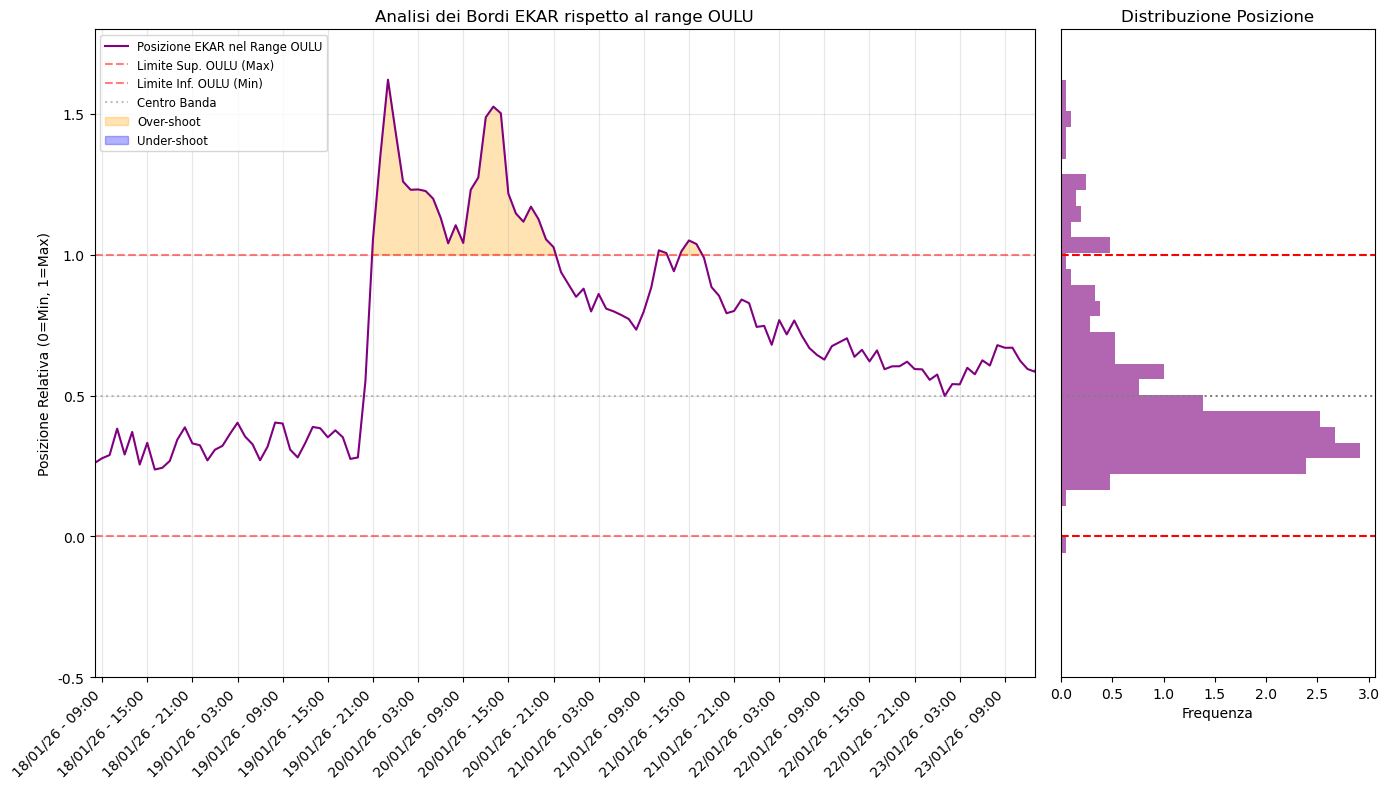

In [56]:
# calcolo l'ampiezza della banda OULU in ogni istante
band_width = oulu_final['max'] - oulu_final['min']

# calcolo dove cade EKAR in percentuale rispetto al min e max di OULU
# P = (EKAR - Min) / (Max - Min)
relative_position = (ekar_final - oulu_final['min']) / band_width

# --- Plotting (Due pannelli: Time Series + Istogramma) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [3, 1]})

# --- Pannello 1: Evoluzione Temporale ---
ax1.plot(relative_position.index, relative_position, color='purple', lw=1.5, label='Posizione EKAR nel Range OULU')

# bordi della banda OULU che ora sono le linee 0 e 1
ax1.axhline(1, color='red', linestyle='--', alpha=0.5, label='Limite Sup. OULU (Max)')
ax1.axhline(0, color='red', linestyle='--', alpha=0.5, label='Limite Inf. OULU (Min)')
ax1.axhline(0.5, color='gray', linestyle=':', alpha=0.5, label='Centro Banda')

# evidenzio le aree fuori dalla banda
ax1.fill_between(relative_position.index, 1, relative_position, 
                 where=(relative_position > 1), color='orange', alpha=0.3, interpolate=True, label='Over-shoot')
ax1.fill_between(relative_position.index, 0, relative_position, 
                 where=(relative_position < 0), color='blue', alpha=0.3, interpolate=True, label='Under-shoot')

ax1.set_title("Analisi dei Bordi EKAR rispetto al range OULU")
ax1.set_ylabel("Posizione Relativa (0=Min, 1=Max)")
ax1.set_ylim(-0.5, 1.8) 
ax1.legend(loc='upper left', fontsize='small')
ax1.grid(True, alpha=0.3)

#t_start = pd.Timestamp("2026-01-17 08:00:00")
#t_end   = pd.Timestamp("2026-01-23 13:00:00")
ax1.set_xlim(t_start, t_end)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y - %H:%M'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# --- Pannello 2: Distribuzione (Istogramma) ---
ax2.hist(relative_position.dropna(), bins=30, orientation='horizontal', color='purple', alpha=0.6, density=True)
ax2.axhline(1, color='red', linestyle='--')
ax2.axhline(0, color='red', linestyle='--')
ax2.axhline(0.5, color='gray', linestyle=':')
ax2.set_title("Distribuzione Posizione")
ax2.set_xlabel("Frequenza")
ax2.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1])
ax2.set_yticks([]) # i tick y  sono condivisi
plt.tight_layout()
plt.show()

Osservando il *picco giallo* sul grafico sopra:

- **Matematicamente:** $E(t) > O_{max}(t)$.
    
- **Fisicamente:** C'è stato un *Forbush Decrease*   
    - **OULU** è crollato drasticamente.
        
    - **EKAR** è crollato molto meno, perché le sue particelle sono più energetiche e risentono meno del campo magnetico solare disturbato.
        
- **Risultato visivo:** Poiché **OULU** è sceso molto più di **EKAR**, la banda di **OULU** è al di sotto della linea di **EKAR**. Questo overshoot rappresenta la **durezza dello spettro** misurato, i muoni sono più "duri" dei neutroni.

## Cross-Correlazione
Per calcolare matematicamente di **quanti minuti/ore** EKAR è in ritardo o in anticipo (*lag*) rispetto a OULU, si utilizza la **Funzione di Cross-Correlazione (CCF)**:

$$R_{xy}(\tau) = \int_{-\infty}^{\infty} x(t) y(t+\tau) \,dt$$

Se il picco dell'area dell'integrale è a $x=0$, i due segnali sono sincroni.

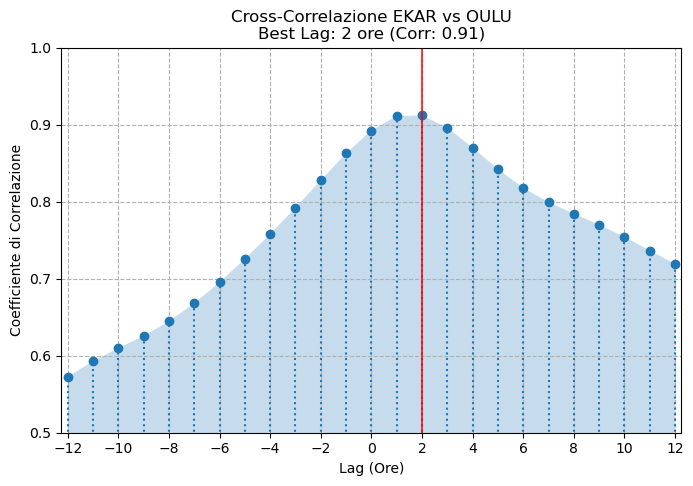

In [57]:
# rimuovo i NaN per il calcolo
s1 = ekar_smooth.dropna() # EKAR (segnale test)
s2 = oulu_scaled['mean'].dropna() # OULU (segnale riferimento)

# allineo sugli indici comuni
common_idx = s1.index.intersection(s2.index)
s1 = s1.loc[common_idx]
s2 = s2.loc[common_idx]

# normalizzazione Z-score per confrontare solo le forme d'onda
s1_norm = (s1 - s1.mean()) / s1.std()
s2_norm = (s2 - s2.mean()) / s2.std()

# --- Calcolo Cross-Correlazione ---
# intervallo di integrazione tra -12 ore e +12 ore
lags = np.arange(-12, 13) # su arange devo usare `stop+1`
correlations = []

for lag in lags:
    corr = s1_norm.corr(s2_norm.shift(lag)) # shift s2 (OULU)
    correlations.append(corr)

# trovo il lag con la correlazione maggiore
best_lag = lags[np.argmax(correlations)]
max_corr = max(correlations)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 5))
ax.fill_between(lags, correlations, alpha=0.25)
ax.stem(lags, correlations, linefmt=':', markerfmt='o', basefmt=' ')
ax.set_xlabel("Lag (Ore)")
ax.set_ylabel("Coefficiente di Correlazione")
ax.set_title(f"Cross-Correlazione EKAR vs OULU\nBest Lag: {best_lag} ore (Corr: {max_corr:.2f})")
ax.xaxis.set_ticks(np.arange(lags[0], lags[-1]+1, 2))
ax.set_ylim(0.5,1)
ax.set_xlim(lags[0]-0.25,lags[-1]+0.25)
ax.grid(True, linestyle='--')

# evidenzio il picco
ax.axvline(best_lag, color='red', linestyle='-', alpha=0.75)

plt.show()

Osservando il grafico sopra si ha:
 - Un **picco** Esattamente a **+2 ore**. 
 - Una **correlazione** $R = 0.91$ molto alta, a conferma che la forma d'onda è quasi identica, ma traslata temporalmente.
    
Durante l'evento Forbush, la perturbazione magnetica interplanetaria è stata "vista" da **EKAR** due ore dopo **OULU**. Il motivo principale è la **Direzione Asintotica**: I due strumenti guardano in direzioni diverse nello spazio. Inoltre, il ritardo temporale dipende da due fattori:

1. **Differenza di Longitudine:** La Terra ruota di $\omega=15^\circ/h$.
    - OULU Longitudine: $25.47^\circ$ E
        
    - EKAR Longitudine: $11.57^\circ$ E
    
    - $\Delta \text{Long} = 13.9^\circ$. 
    
    Poiché la Terra ruota da Ovest verso Est, il Sole (e l'anisotropia dei raggi cosmici) passa prima sopra **OULU** e poi sopra **EKAR**. 
    $$\Delta t=\frac{\Delta \text{Long}}{\omega } = \frac{13.9^\circ}{15^\circ/h}  \approx 0.93 \text{ ore }  (56 \text{ minuti} )$$
    _Solo per la posizione, EKAR dovrebbe essere in ritardo di circa 1 ora._
1. **Differenza di Rigidità (Deflessione Magnetica):** Le particelle cariche vengono curvate dal campo magnetico terrestre _prima_ di arrivare allo strumento. Questa curvatura dipende dalla loro energia ($R_c$).
    - I raggi cosmici primari che generano i neutroni di **OULU** ($R_c=0.81$ GV) sono molto "molli" e subiscono una forte deflessione.
        
    - I raggi cosmici primari che generano i muoni di **EKAR** ($R_c=4.70$ GV) sono più "duri" e vengono deflessi diversamente.
        
    Questa differenza fa sì che **EKAR** stia "guardando" in una *direzione asintotica* diversa rispetto alla sua verticale locale, accumulando quell'ora extra di ritardo.

## Spazio delle Fasi

Poiché il comportamento in discesa è diverso da quello in salita il *diagramma delle fasi* mostrerà visivamente il ciclo che il sistema ha percorso. Se fosse un sistema lineare semplice senza sfasamenti, sul grafico apparirebbe una riga. Sapendo che *esiste uno sfasamento*, quello che ci si aspetta è un anello che rappresenta la *memoria* del sistema (le particelle ad alta energia recuperano prima).

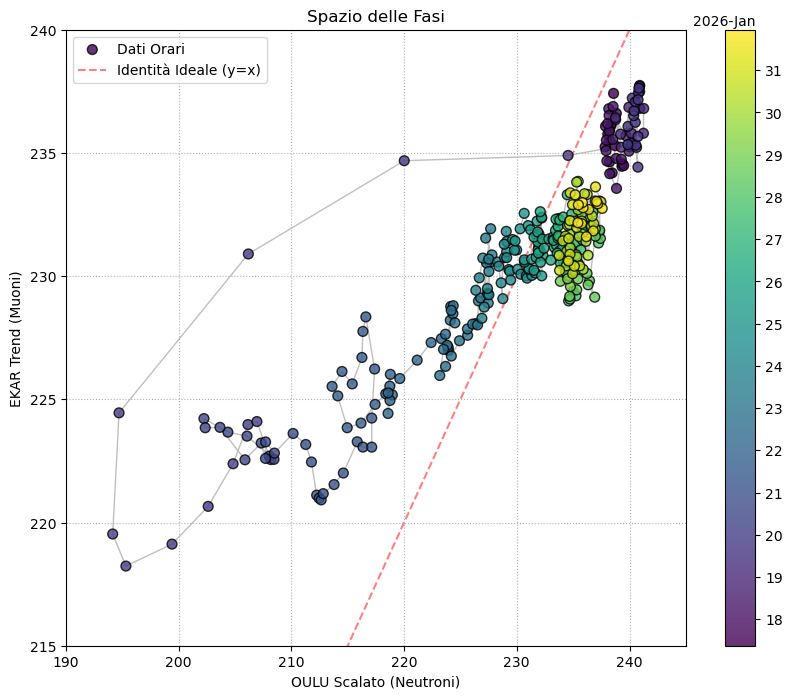

In [58]:
x_val = oulu_final.loc[:'2026-01-31','mean'].dropna()
y_val = ekar_final.loc[:'2026-01-31'].dropna()

# creo una mappa di colori basata sul tempo per vedere l'evoluzione
times = mdates.date2num(x_val.index)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(x_val, y_val, c=times, cmap='viridis', alpha=0.8, s=50, edgecolors='k', zorder=2, label='Dati Orari')
# linea sottile per mostrare l'ordine temporale
ax.plot(x_val, y_val, color='gray', alpha=0.5, lw=1, zorder=1)

# aggiungo la linea di identità ideale (y=x)
lims = np.array([
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
])
ax.plot(lims, lims, 'r--', alpha=0.5, zorder=0, label='Identità Ideale (y=x)')

# linea di regressione lineare
#m, q = np.polyfit(x_val.dropna(), y_val.dropna(), deg=1)
#ax.plot(lims, m*lims + q, 'g--', alpha=0.75, zorder=3, label=f'Regressione Lineare m={round(m,2)}, q={round(q,2)}')

#ax.set_aspect('equal') # importante per non distorcere il loop
ax.set_ylim(215, 240) 
ax.set_xlim(190, 245) 

# formattazione colorbar con date leggibili
cbar = plt.colorbar(sc, ax=ax)
loc = mdates.AutoDateLocator()
cbar.ax.yaxis.set_major_locator(mdates.DayLocator(interval=1))
cbar.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))

ax.set_xlabel('OULU Scalato (Neutroni)')
ax.set_ylabel('EKAR Trend (Muoni)')
ax.set_title('Spazio delle Fasi')
ax.legend()
ax.grid(True, linestyle=':')

plt.show()

Osservando il grafico sopra:

L'identità ideale rappresenta la condizione in cui **EKAR** e **OULU** fossero lo stesso strumento. Ovviamente non è così e, quando inizia l'evento (dai punti viola ai punti blu/azzurri) si ha:

- **Movimento Orizzontale Marcato:** I punti si spostano bruscamente a sinistra (**OULU** crolla da ~240 a ~195 CPM).
    
- **Movimento Verticale Minimo:** **EKAR** scende appena (da ~238 a ~218 CPM).
    
Lo spazio delle fasi è deformato _sopra_ la linea rossa e nella fase di *recupero* (i punti dal blu scuro al verde/giallo):

- I punti non tornano indietro sulla stessa strada dell'andata ma formano un **arco superiore**.
    
- **I punti Gialli (Fine evento):** I punti gialli rispetto a quelli viola scuro (inizio) sono quasi alla stessa altezza $y$ (**EKAR** recupera più velocemente), ma sono ancora spostati a sinistra sulla $x$ (**OULU** recupera più lentamente).
    
Questo è tipico dei Forbush Decrease: le alte energie recuperano in 1-2 giorni, le basse energie possono impiegarne 4-5 giorni o più.